In [1]:
%matplotlib inline 

import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt


In [2]:
gp.__version__


'0.8.0'

In [3]:
names = gp.get_library_name()
names[:10]


[u'Achilles_fitness_decrease',
 u'Achilles_fitness_increase',
 u'Aging_Perturbations_from_GEO_down',
 u'Aging_Perturbations_from_GEO_up',
 u'Allen_Brain_Atlas_down',
 u'Allen_Brain_Atlas_up',
 u'BioCarta_2013',
 u'BioCarta_2015',
 u'BioCarta_2016',
 u'BioPlex_2017']

In [4]:
gene_list = pd.read_table("/home/gpratt/software/GSEApy/data/gene_list.txt",header=None)
gene_list.head()

,0
0,CTLA2B
1,SCARA3
2,LOC100044683
3,CMBL
4,CLIC6


In [7]:
glist = gene_list.squeeze().tolist()
print(glist[:10])

['CTLA2B', 'SCARA3', 'LOC100044683', 'CMBL', 'CLIC6', 'IL13RA1', 'TACSTD2', 'DKKL1', 'CSF1', 'CITED1']


In [8]:
enr = gp.enrichr(gene_list=glist, description='test_name', gene_sets='KEGG_2016',
                             outdir='enrichr_kegg', cutoff=0.5, no_plot=False)


In [10]:
enr.res2d.iloc[:5,:6]


,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value
0,Rap1 signaling pathway_Homo sapiens_hsa04015,19/211,0.000148,0.035223,0.000436,0.103734
1,Pathways in cancer_Homo sapiens_hsa05200,27/397,0.000729,0.066282,0.001816,0.152127
2,Ras signaling pathway_Homo sapiens_hsa04014,18/227,0.000999,0.066282,0.002351,0.152127
3,Dilated cardiomyopathy_Homo sapiens_hsa05414,10/90,0.001114,0.066282,0.002557,0.152127
4,HTLV-I infection_Homo sapiens_hsa05166,19/258,0.001747,0.083151,0.003877,0.184562


In [11]:
phenoA,phenoB, class_vector =  gp.parser.gsea_cls_parser("/home/gpratt/software/GSEApy/data/P53.cls")


In [12]:
gene_exp = pd.read_table("/home/gpratt/software/GSEApy/data/P53_resampling_data.txt")
gene_exp.head()

,NAME,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,CTLA2B,111.19,86.22,121.85,75.19,208.62,130.59,124.72,324.09,242.71,...,163.76,59.50,134.12,152.09,197.46,137.79,81.53,123.37,81.41,180.78
1,SCARA3,460.30,558.34,183.55,37.29,158.00,43.61,80.83,300.08,1250.25,...,109.91,120.42,73.06,115.03,95.12,37.56,76.16,41.10,77.51,519.17
2,LOC100044683,97.25,118.94,81.17,119.51,119.88,107.73,165.57,203.97,135.43,...,222.84,124.98,114.75,141.66,170.19,147.70,157.48,152.18,98.89,118.06
3,CMBL,33.45,55.10,221.67,50.30,35.12,75.70,84.01,44.12,79.96,...,51.32,117.11,59.46,78.46,45.55,49.07,96.69,33.09,10.38,52.89
4,CLIC6,35.75,41.26,63.04,219.86,42.53,54.19,86.98,71.20,53.89,...,154.05,31.62,37.66,32.64,63.35,27.95,70.99,36.25,17.50,49.41


In [13]:
gs_res = gp.gsea(data=gene_exp, gene_sets='KEGG_2016', cls=class_vector, 
                 permutation_type='phenotype', #set permutation_type to phenotype when 
                 outdir='gsea_reprot', method='signal_to_noise', format='png')


/home/gpratt/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [14]:
gsea_results= gs_res.res2d
gs_res.res2d.head()

,es,nes,pval,fdr,gene_set_size,matched_size,genes
Term,,,,,,,
Ras signaling pathway_Homo sapiens_hsa04014,0.332033,1.023370,0.000000,0.002258,227,18,"ETS1, GNG13, RRAS, VEGFC, GNB4, CSF1, ..."
HTLV-I infection_Homo sapiens_hsa05166,-0.249752,-1.194389,0.006000,0.006636,258,19,"FZD2, ETS1, STAT5B, RRAS, LTBR, PPP..."
Rap1 signaling pathway_Homo sapiens_hsa04015,-0.285975,-1.468400,0.006000,0.006636,211,19,"RRAS, VEGFC, CSF1, FGF17, PDGFRB, FGF4, ..."
MAPK signaling pathway_Homo sapiens_hsa04010,-0.392928,-1.034112,0.666667,0.006967,255,18,"GADD45B, RRAS, SOS2, FGF17, PPP3CC,TN..."
Pathways in cancer_Homo sapiens_hsa05200,0.201838,0.698136,1.000000,1.000000,397,27,"FZD2, ETS1, STAT5B, GNG13, VEGFC, GNB4, ..."


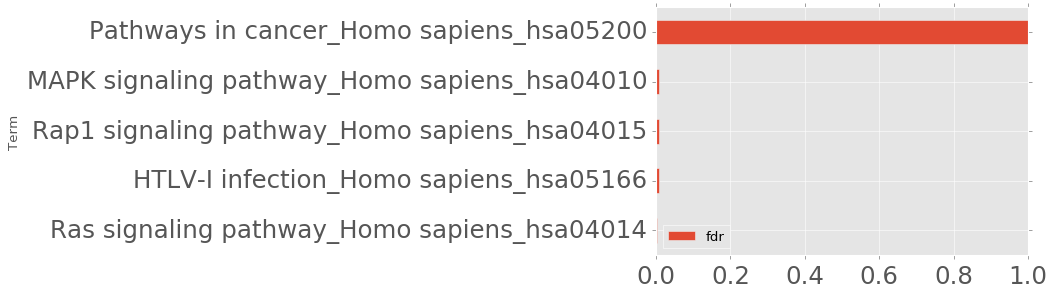

In [15]:
with plt.style.context('ggplot'):
    gsea_results = gsea_results.reset_index()
    gsea_results.head(5).plot.barh(y='fdr',x='Term',fontsize=22)


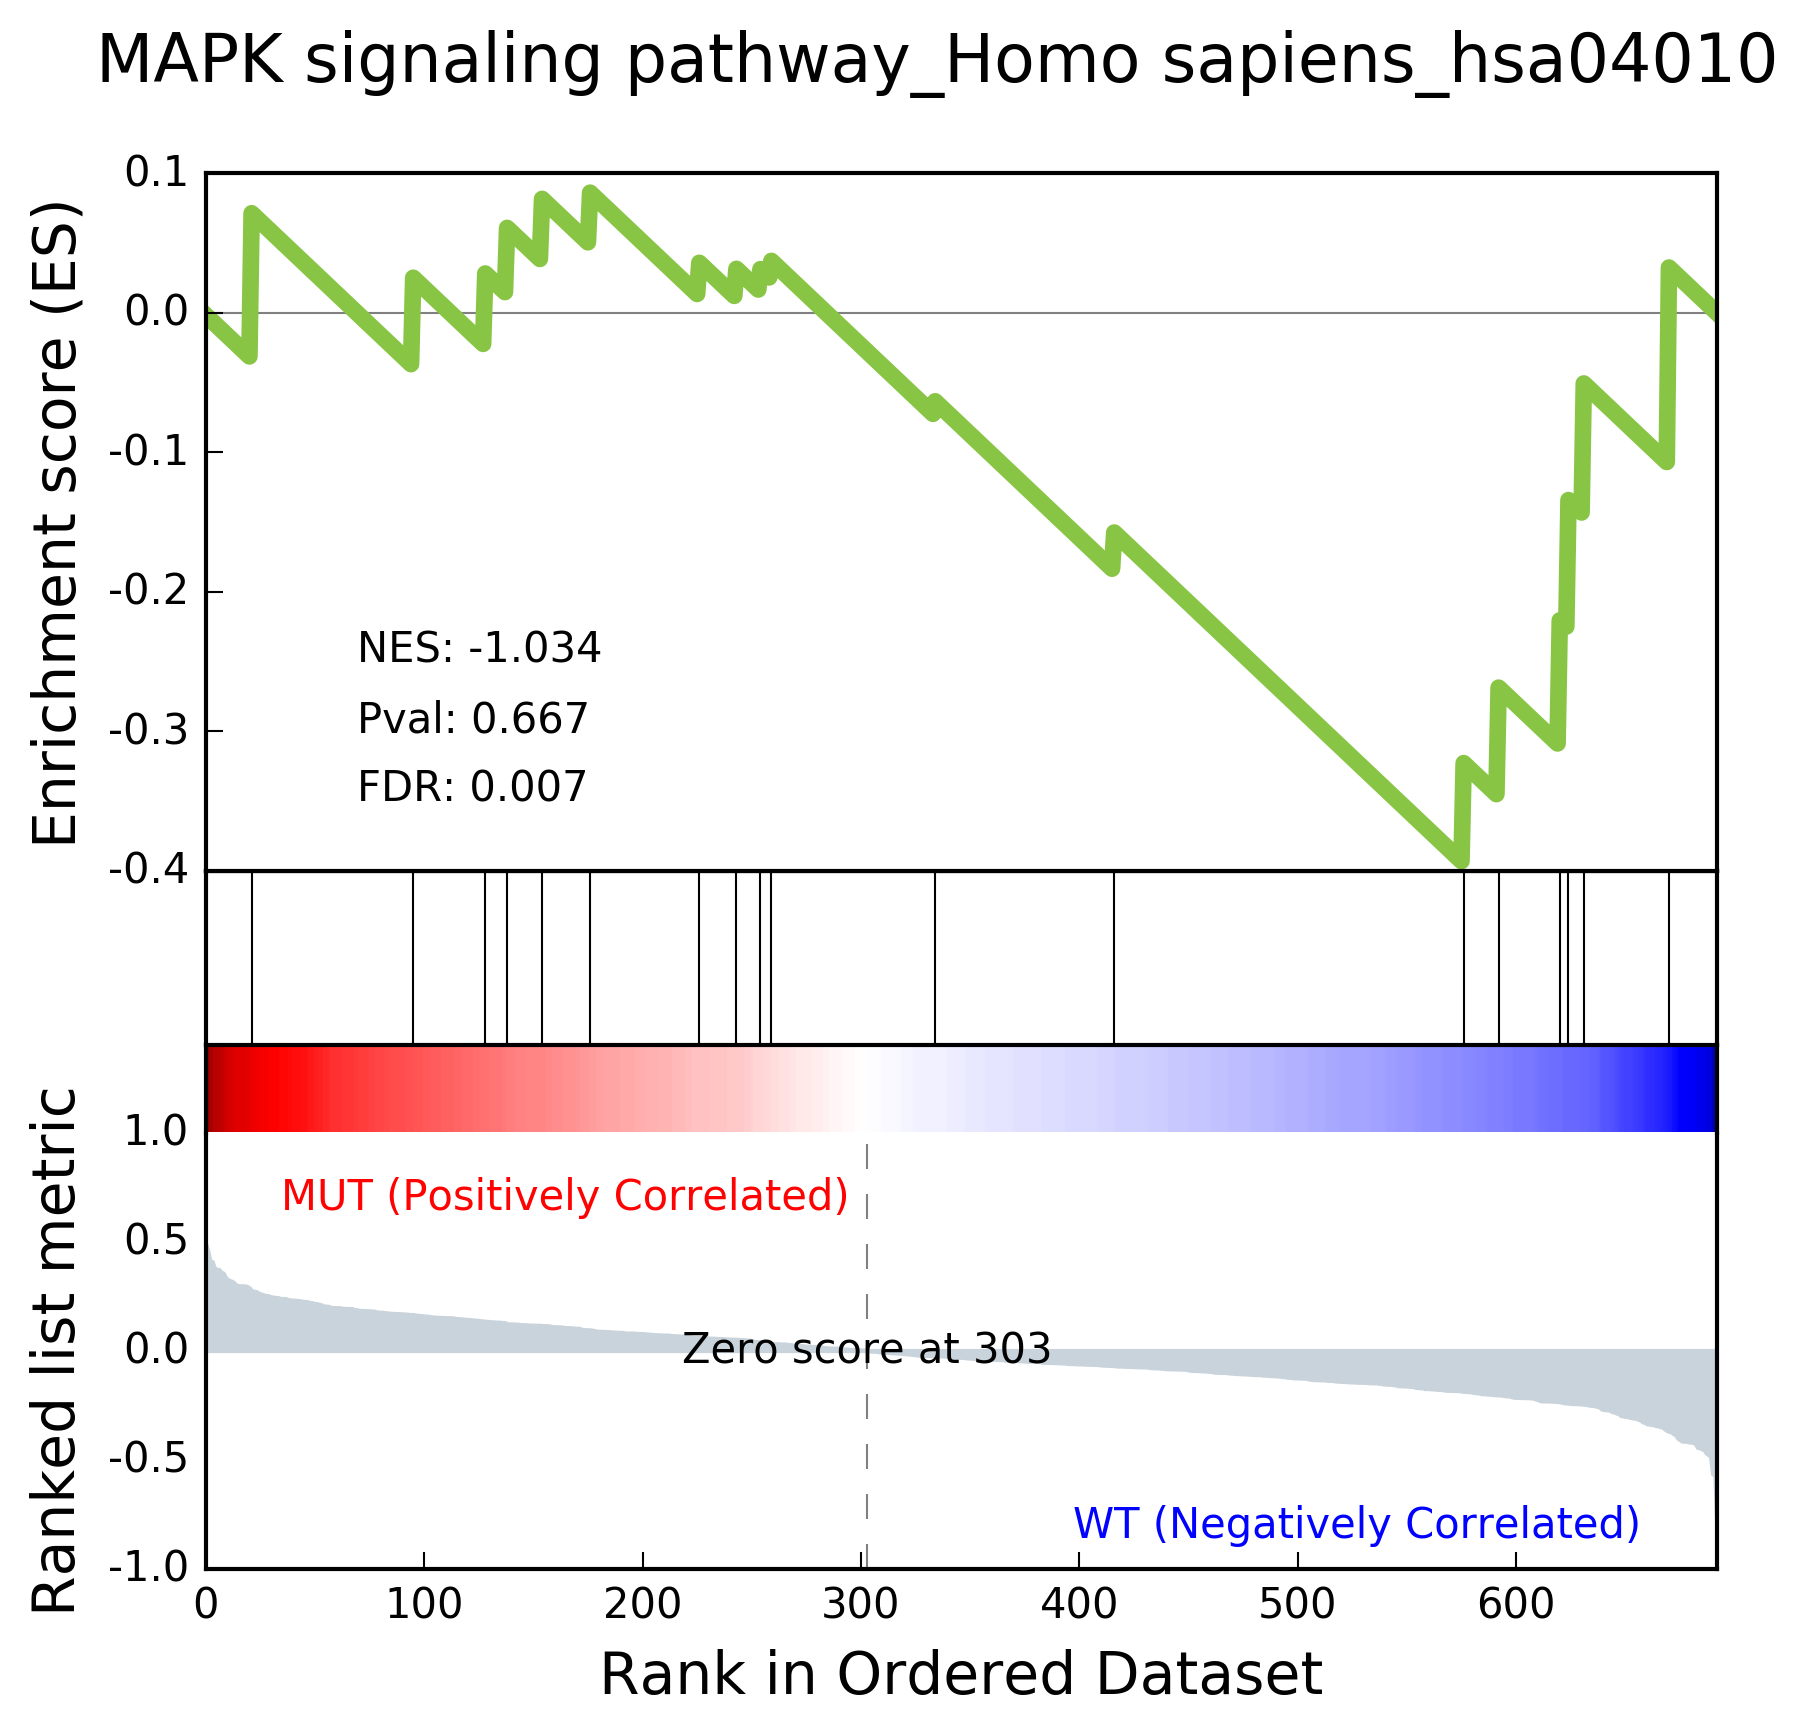

In [17]:
from IPython.display import Image

#erich plot
Image("./gsea_reprot/MAPK signaling pathway_Homo sapiens_hsa04010.gsea.png",width=650, height=600)


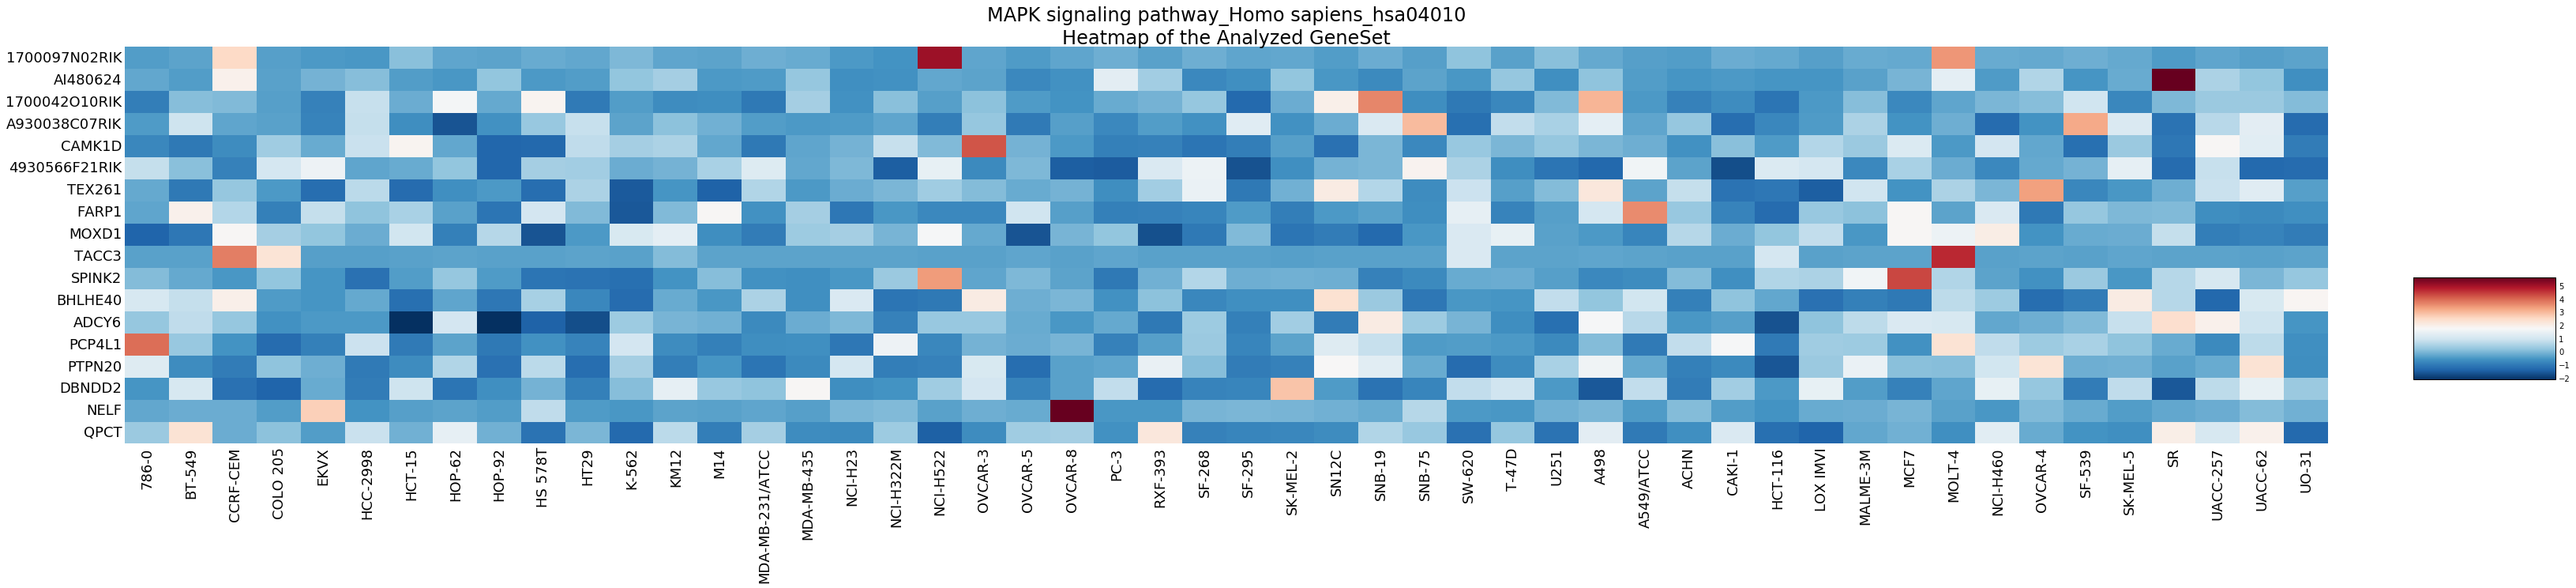

In [18]:
#corresponding heatmap
Image("./gsea_reprot/MAPK signaling pathway_Homo sapiens_hsa04010.heatmap.png")

Can put this aside

GMT format is here: http://webcache.googleusercontent.com/search?q=cache:http://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats
                
                Just need to create the gene sets to analyze
                
the CLS format is probably more important.  I'll need to create one of those for each localization pattern.  